              precision    recall  f1-score   support

           0       0.84      0.95      0.89        40
           1       0.93      0.80      0.86        35

    accuracy                           0.88        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.89      0.88      0.88        75



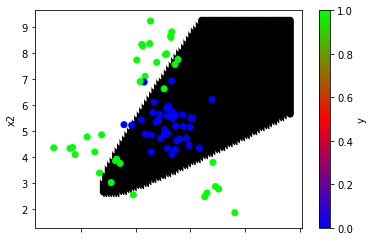

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm

data = pd.read_csv('multiple2.csv', header=None, names=['x1', 'x2', 'y'])
data.plot.scatter(x='x1', y='x2', c='y', cmap='brg')

# 整理数据集,拆分测试集和训练集
x, y = data.iloc[:, :-1], data['y']
train_x, test_x, train_y, test_y =ms.train_test_split(x, y, test_size=0.25, random_state=7)
model = svm.SVC(kernel='poly', degree=2)
model.fit(train_x, train_y)
pred_text_y = model.predict(test_x)
print(sm.classification_report(test_y, pred_text_y))

# 暴力绘制分类边界线
# 从x的 min-max 拆出100个x坐标
# 从y的 min-max 拆出100个y坐标,一共组成10000个坐标点,预测每个坐标点的类别标签,绘制散点
xs = np.linspace(data['x1'].min(), data['x1'].max(), 100)
ys = np.linspace(data['x2'].min(), data['x2'].max(), 100)
points = []
for x in xs:
    for y in ys:
        points.append([x, y])
points = np.array(points)
point_labels = model.predict(points)
plt.scatter(points[:, 0], points[:, 1], c=point_labels, cmap='gray')
plt.scatter(test_x['x1'], test_x['x2'], c=test_y, cmap='brg')

